<a href="https://colab.research.google.com/github/DavidMedeiros/Tokenizacao-e-Stemming/blob/master/Lab_3_RecInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import collections

import nltk
from nltk.stem import RSLPStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('rslp')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Funções Auxiliares


In [0]:
"""
  Verifica se há numeros na string 
"""
def hasNumbers(inputString):
  return bool(re.search(r'\d', inputString))


"""
  Produz um dicionário com os tokens stemmizados e as respectivas palavras que deram origem para aquele radical. 
  Essa função é utilizada apenas para fins de visualização dos stemmings e facilitar no processo de encontrar os falsos positivos/negativos.
"""
def show_stemmings(tokens_filtered):
  tokens_stemmed = collections.OrderedDict()
  
  for token in list(tokens_filtered):
    if (stemmer.stem(token) in tokens_stemmed.keys()):
      if (token not in tokens_stemmed[stemmer.stem(token)]):
          tokens_stemmed[stemmer.stem(token)].append(token)
    else:
      tokens_stemmed[stemmer.stem(token)] = [token]
      
  return tokens_stemmed

# Questão 1

Nesta questão, adotei uma estratégia de tokenização diferente para a [coleção](https://raw.githubusercontent.com/DavidMedeiros/ri_lab_01/master/output/results.csv) utilizada. Aqui, adicionamos o uso de stopwords, removendo-as dos  tokens encontrados. Além disso, também foi aplicado o tratamento de remoção de strings contendo números e palavras com menos de três caractéres. Ainda, para este lab, as palavras contendo hífem foram tratadas como uma só. Ademais, a transformação dos caractéres das paravras para minúsculo não foi feita, uma vez que, não realizando este procedimento, ganharemos mais informações sobre nosso conjunto de dados (por exemplo, a distinção do que seria Apple ou apple - caractére inicial maiúsculo para a empresa e minúsculo para a fruta). Todas essas estratégias foram adotadas com a finalidade de manter o conjunto de dados mais claro e filtrado de informações que não serão relevantes em buscas futuras. 


In [0]:
dataset_url = 'https://raw.githubusercontent.com/DavidMedeiros/ri_lab_01/master/output/results.csv'
csv = pandas.read_csv(dataset_url)
documents = csv['text']

tokens = []
tokens_filtered= []

toker = RegexpTokenizer('''\w+[-']*\w*''')
stopwords = stopwords.words("portuguese")

for document in documents:
  tokens = tokens + toker.tokenize(document)

for token in tokens:
  if token not in stopwords and len(token) > 2 and not hasNumbers(token):
    tokens_filtered.append(token)

# Questão 2
A saída desta questão tem a tabela_4_2 como resultado, exibindo as top 50 frequências, além do ranking, probabilidade e probabilidade * rank de uma determinada palavra. A frequência é a quantidade de ocorrências daquela palavra nos tokens encontrados. O rank classifica essas frequencias da maior para a menor. Já a probabilidade é a frequência sobre o total de ocorrências daquela palavra. A última coluna mostra o rank multiplicado por esta probabilidade encontrada.

-

Diferentemente do lab anterior, aqui, estamos lidando apenas com os tokens filtrados de acordo com as estratégias descritas e justificadas na questão 1. Notamos que as stopwords não permanecem mais no topo do ranking, dando lugar para palavras mais significativas do nosso conjunto de dados. Além disso, como as estatísticas mudaram (tamanho do vocabulário, ocorrência de palavras, etc.) as colunas de valores na tabela também foram alteradas, mesmo para palavras que já apareciam no top 50 do ranking no lab 2. 


In [79]:
total_word_ocurrences = len(tokens_filtered)

words = pandas.DataFrame(tokens_filtered, columns=['word'])
table_4_2 = words.word.value_counts().reset_index()
table_4_2.columns = ['word', 'freq']
table_4_2['r'] = table_4_2.freq.rank(ascending=False, method='first')

pr = table_4_2.freq / total_word_ocurrences * 100
rpr = table_4_2.r * pr / 100

table_4_2['Pr %'] = round(pr, 2)
table_4_2['r.Pr'] = round(rpr, 3)

table_4_2[0:50]

,word,freq,r,Pr %,r.Pr
0,Bolsonaro,154,1.0,0.80,0.008
1,Brasil,149,2.0,0.77,0.015
2,presidente,117,3.0,0.60,0.018
3,sobre,97,4.0,0.50,0.020
4,governo,86,5.0,0.44,0.022
5,disse,83,6.0,0.43,0.026
6,Jair,66,7.0,0.34,0.024
7,contra,63,8.0,0.33,0.026
8,ministro,62,9.0,0.32,0.029
9,país,61,10.0,0.32,0.032


# Questão 3

Nesta questão, apliquei stemming aos tokens produzidos e filtrados. Para isto, optei por utilizar o RSLP,  pois é um stemming para língua portuguesa, que apresentou um resultado mais satisfatório em relação ao Porter Stemming. 

Objetivando encontrar falsos positivos e negativos, a função show_stemmings() foi utilizada. Ela exibe os radicais (stemmings) gerados e as respectivas palavras que deram origem para aquele radical. (Ela foi mantida na seção de Funções Auxiliares apenas para fins demonstrativos, mas não se faz mais necessária, por isto, não há mais chamada para ela).

-

Modelo:  **RADICAL** - [ palavras encontradas para aquele radical ]


### **Falsos Negativos encontrados:**

1.   **adicion** - ['adicionar'] **adicioná-l** - ['adicioná-lo']
2.   **agir** - ['agir'] **agiu** - ['agiu']
3.   **anunc** - ['anuncia', 'anunciam'] **anunci** - ['anunciou', 'anunciado', 'anunciadas', 'anunciar', 'anunciada', 'anunciaram', 'anunciando']
4.   **apo** - ['apoiam'] **apoi**  - ['apoio', 'apoiadores', 'apoiar', 'apoiamos', 'apoiado', 'apoiando', 'Apoio']
5.   **asseg** - ['assegura'] **assegur** - ['asseguram', 'assegurou', 'assegurem', 'assegurar']
6.   **burgu** - ['burguês', 'burguesa', 'Burguês'] **burgues** - ['burgueses']
7.   **caracter** - ['caracterizado'] **caracteriz** - ['caracteriza', 'caracterizaram', 'caracterizou']
8.  **consid** - ['considera'] **consider** - ['considerado', 'considerou', 'consideradas', 'considerados', 'considerar', 'considerada', 'consideração']
9.  **advocac** - ['Advocacia'] **advocacia-ger** - ['Advocacia-Geral']
10.  **aul** - ['aula', 'aulas'] **aula-debat** - ['aula-debate']

### **Falsos Positivos encontrados:**

1.  **post** - ['Postando', 'postagem', 'postando', 'posts', 'posto', 'postos', 'posta', 'Post', 'postura', 'postou', 'post']
2.   **banc** - ['bancada', 'Banco', 'bancário', 'bancários', 'bancadas', 'banco']
3. **can** - ['cantora', 'cantores', 'cantor', 'cano', 'cana']
4.  **pi** - ['piada', 'piores', 'pior']
5. **carr** - ['carreira', 'carro', 'carros']
6. **cas** - ['caso', 'casos', 'casa', 'Casa', 'Casara', 'Caso']
7. **est** - ['estar', 'Estado', 'estado', 'Estados', 'Estão', 'Está', 'Estou', 'estima', 'estarem', 'Estamos', 'Estávamos', 'estados', 'estimo', 'esteira', 'estarei', 'estaria']
8. **ele** - ['Eles', 'Ele', 'eleições', 'eleição', 'Eleições']
9. **med** - ['medidas', 'medo', 'medida', 'mede', 'medir', 'Medida', 'Medeiros']
10. **sent** - ['sentidos', 'sentido', 'sentimentos', 'sentir', 'sentavam', 'sentindo']


Falsos negativos/positivos como estes teriam impacto negativo no momento da busca, uma vez que, geraria resultados que não condizem com o esperado. Por exemplo, para os falsos positivos, palavras com contextos diferentes seriam atribuidas ao mesmo radical, assim, o usuário que estivesse buscando por casa, para o radical cas, ele receberia informações que não desejaria, a exemplo de: caso, casos, casara. O mesmo acontece com os outros itens da lista. Como outro exemplo, poderiamos imaginar que o usuário estivesse buscando por capital. Ele iria receber informações não desejadas, a exemplo de capitalismo. Já nos falsos negativos, palavras que deveriam ser produzidas para o mesmo radical, acabaram com radicais diferentes. Assim, a busca não seria tão eficiente, pois não retornaria todos os resultados possíveis. Por exemplo, ao buscar por aula, a nossa busca não retornaria também os resultados sobre aula-debate, deixando de exibir todos os resultados possivelmente relevantes. O mesmo acontece para advocacia, que não retornaria os resultados sobre advocacia-geral.




In [0]:
stemmer = nltk.stem.RSLPStemmer()

tokens_stemmed = []
  
for token in list(tokens_filtered):
  tokens_stemmed.append(stemmer.stem(token)) 

# Questão 4
Nesta questão é exibido o gráfico (rank vs. frequencia) para os stemmings encontrados. Os pontos azuis representam o rank do stemming vs. a sua frequência. Já a reta representa o **valor de C para o melhor ajuste. Neste caso, calculei a média de R*PR para estimar c.**

Há sim, uma diferença em relação aos tokens sem stemming. Uma vez que as palavras são reduzidas para radicais em comum, a frequencia das palavras aumentam, assim, aumentando a frequencia das palavras no topo do ranking. Outra diferença notória é que os pontos não se alinham tão bem com a estimativa, diferentemente do que ocorria com os tokens sem stemming.

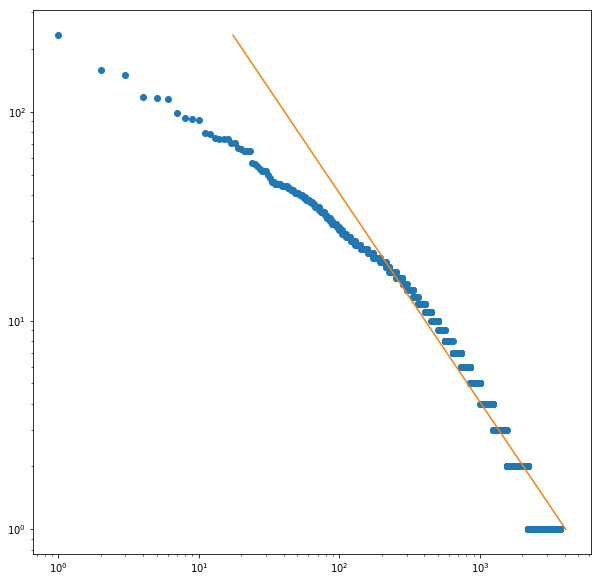

In [81]:
total_stemmed_tokens_ocurrences = len(tokens_stemmed)

words = pandas.DataFrame(tokens_stemmed, columns=['word'])
table_stemming = words.word.value_counts().reset_index()
table_stemming.columns = ['word', 'freq']
table_stemming['r'] = table_stemming.freq.rank(ascending=False, method='first')

pr_stemming = table_stemming.freq / total_stemmed_tokens_ocurrences * 100
rpr_stemming = table_stemming.r * pr / 100


table_stemming['pred'] = np.mean(rpr_stemming) / pr_stemming * 100 

%matplotlib inline

f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")

plt.plot(table_stemming['r'], table_stemming['freq'], linestyle="", marker='o')
plt.plot(table_stemming['pred'], table_stemming['freq'], linestyle="-", marker='')
plt.show()